Pattern Recognition Project
# Steam Review
   Our goal is to train a model to predict if a steam review is a bad review or not. We got out data from [steam review](https://www.kaggle.com/luthfim/steam-reviews-dataset)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read and display data

In [2]:
df = pd.read_csv("steam_reviews.csv")
display(df.head())
print("Games titles \n",df['title'].unique())
print("Amount of game titles in the data", len(df['title'].unique()))

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,2019-02-10,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,2019-02-10,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,2019-02-07,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,2018-06-14,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,2017-06-20,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


Games titles 
 ['Expansion - Hearts of Iron IV: Man the Guns' 'Dead by Daylight'
 'Wargroove' 'Wallpaper Engine' 'Factorio' 'Insurgency: Sandstorm'
 'Cold Waters' 'Tannenberg' 'Pathfinder: Kingmaker'
 'MONSTER HUNTER: WORLD' 'Divinity: Original Sin 2 - Definitive Edition'
 'Football Manager 2019' "Garry's Mod" 'Survivor Pass: Vikendi'
 'Moonlighter' 'Terraria' 'GOD EATER 3' 'Sid Meier’s Civilization® VI'
 'Rocket League®' 'Subnautica: Below Zero'
 "Tom Clancy's Rainbow Six® Siege" 'ASTRONEER'
 'Sid Meier’s Civilization® VI: Rise and Fall' 'Kenshi'
 'Euro Truck Simulator 2' 'Grand Theft Auto V' 'RimWorld' 'NBA 2K19'
 'RESIDENT EVIL 2 / BIOHAZARD RE:2' 'Slay the Spire' 'My Time At Portia'
 'Foundation' 'Beat Saber' "Sid Meier's Civilization® VI: Gathering Storm"
 'Stardew Valley' 'Farming Simulator 19' "PLAYERUNKNOWN'S BATTLEGROUNDS"
 'Overcooked! 2' "Don't Starve Together" 'Rust' 'Subnautica'
 'ACE COMBAT™ 7: SKIES UNKNOWN' 'Left 4 Dead 2' 'ARK: Survival Evolved'
 'Battlefleet Gothic: A

## Filter data to only PLAYERUNKNOWN'S BATTLEGROUNDS game

In [3]:
df = df[df['title'] == "PLAYERUNKNOWN\'S BATTLEGROUNDS"]
display(df.head())

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
214781,2017-12-15,0,0,194,True,Not Recommended,193 Hours truly wasted. No to this game simply...,PLAYERUNKNOWN'S BATTLEGROUNDS
214782,2017-12-20,0,0,574,False,Not Recommended,MAKE SERVERS REGION RESTRICTED! There's so man...,PLAYERUNKNOWN'S BATTLEGROUNDS
214783,2018-03-02,0,0,228,False,Not Recommended,reskin version of h1z1 kotk. taking the same p...,PLAYERUNKNOWN'S BATTLEGROUNDS
214784,2017-10-04,0,0,141,True,Recommended,Fun game should be great once it's finished.,PLAYERUNKNOWN'S BATTLEGROUNDS
214785,2018-01-07,0,0,426,False,Not Recommended,Just at the current state that the game is in ...,PLAYERUNKNOWN'S BATTLEGROUNDS


## Check for if the game is recommended and count the length of the game review.

In [4]:
def length(df):
    return len(str(df['review']))

def count(df):
    if df['recommendation'] == 'Recommended':
        return 1
    else:
        return 0


df['review_len'] = df.apply(length,axis=1)
df['recommendation_flag'] = df.apply(count,axis=1)

In [5]:
df.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title,review_len,recommendation_flag
214781,2017-12-15,0,0,194,True,Not Recommended,193 Hours truly wasted. No to this game simply...,PLAYERUNKNOWN'S BATTLEGROUNDS,99,0
214782,2017-12-20,0,0,574,False,Not Recommended,MAKE SERVERS REGION RESTRICTED! There's so man...,PLAYERUNKNOWN'S BATTLEGROUNDS,268,0
214783,2018-03-02,0,0,228,False,Not Recommended,reskin version of h1z1 kotk. taking the same p...,PLAYERUNKNOWN'S BATTLEGROUNDS,301,0
214784,2017-10-04,0,0,141,True,Recommended,Fun game should be great once it's finished.,PLAYERUNKNOWN'S BATTLEGROUNDS,44,1
214785,2018-01-07,0,0,426,False,Not Recommended,Just at the current state that the game is in ...,PLAYERUNKNOWN'S BATTLEGROUNDS,923,0


## Count the good and bad reviews of the game.

0    58120
1    86726
Name: review, dtype: int64


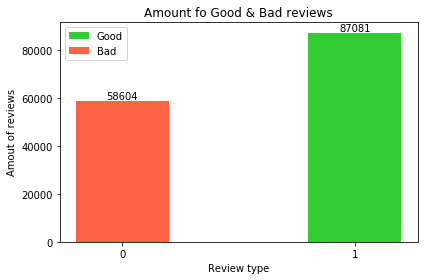

In [14]:
rec_count = df.groupby(['recommendation_flag']).count()
rec_count = rec_count.reset_index()

print(rec_count['review'])

fig, ax = plt.subplots()
labels = ['0', '1']

rect1 = ax.bar(rec_count.loc[1, 'recommendation_flag'],
               rec_count.loc[1, 'funny'], label='Good', width=0.4, color='limegreen')
rect2 = ax.bar(rec_count.loc[0, 'recommendation_flag'],
               rec_count.loc[0, 'funny'], label='Bad', width=0.4, color='tomato')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
autolabel(rect1)
autolabel(rect2)
ax.set_ylabel('Amout of reviews')
ax.set_xlabel('Review type')
ax.set_title('Amount fo Good & Bad reviews')

fig.tight_layout()
plt.legend()
plt.show()

## Clean and Split data

In [7]:
from sklearn.model_selection import train_test_split
clean_data = df.dropna()

# Seperate features
train = clean_data
X = train['review']
y = train['recommendation_flag']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=273, stratify=y)

## Train Data

In [9]:
from time import time

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [21]:
# Zoo of vectorizers inside a pipline, some include comments
t0 = time()
text_clf = Pipeline([('vect', CountVectorizer(min_df=5)),
                     #('vect', TfidfTransformer(norm=None)),
                     # ('vect', TfidfVectorizer(max_df=0.99, norm='l2')), #< default, cuts some generic words
                     # ('vect', TfidfVectorizer(max_df=0.2, norm='l2')), #< default, leaves generic words
                     # ('vect', TfidfVectorizer(max_df=0.99, norm='l2', ngram_range=(4, 4))), #< some useful info
                     #('clf', MultinomialNB())
                     #('clf', LogisticRegression(solver='saga', fit_intercept=True, class_weight='balanced'))
                     # ('clf', LogisticRegression(solver='saga', fit_intercept=True, class_weight='balanced', C=0.1)) #< reasonable
                     # ('clf', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=273, max_iter=5, tol=None)) #< SVM, SGD version, sometimes delivers good results
                     ])
# GaussianNB() - Doesn't Work data too spares

print("preprocessing done in %0.3fs." % (time() - t0))

t0 = time()
text_clf.fit(X_train, y_train)
print("fitting done in %0.3fs." % (time() - t0))

t0 = time()
y_pred = text_clf.predict(X_test)
print("predicting done in %0.3fs." % (time() - t0))
print(classification_report(y_test, y_pred))

preprocessing done in 0.000s.


TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.